In [4]:
from cdk.analysis.cytosol import platereader as pr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize plotting
pr.plot_setup()

# Load the data

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

## Platemap Merge

The platemap on the experiment was complicated enough that it was easier to make three, one for each of Buffer Exchange unit testing, the Full Send, and the poisoning experiment. Before doing the full load, we load them in and merge them together, spitting them out to a merged file.

In [3]:
platemap_be = pd.read_table("../1-design/20250516-final-platemap-buffer-unit-test.tsv")
platemap_be.head()

,Well,Row,Column,Experiment,Name,Type,Replicate,NEB Sol A (uL),NEB Sol B (uL),NEB Sol B -Ribos (uL),...,OnePot PMx BE #2 (uL),OnePot PMx BE #3 (uL),OnePot PMx BE #4 (uL),OnePot PMx BE #5 (uL),OnePot PMx OG #1 (uL),b.next PMx (uL),bn Ribosome (uL),RNase Inhibitor (uL),pT7-plamGFP (uL),Ultrapure water (uL)
0,N2,N,2,BE Unit Test,OnePot BE #1,Sample,1,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.50,1.25,1.25,7.00
1,N4,N,4,BE Unit Test,OnePot BE #2,Sample,1,10,NaN,NaN,...,3.00,NaN,NaN,NaN,NaN,NaN,2.50,1.25,1.25,7.00
2,N6,N,6,BE Unit Test,OnePot BE #3,Sample,1,10,NaN,NaN,...,NaN,3.00,NaN,NaN,NaN,NaN,2.50,1.25,1.25,7.00
3,N8,N,8,BE Unit Test,OnePot BE #4,Sample,1,10,NaN,NaN,...,NaN,NaN,3.00,NaN,NaN,NaN,2.50,1.25,1.25,7.00
4,N10,N,10,BE Unit Test,OnePot BE #5,Sample,1,10,NaN,NaN,...,NaN,NaN,NaN,3.00,NaN,NaN,2.50,1.25,1.25,7.00


In [5]:
platemap_fs = pd.read_table("../1-design/20250516-final-platemap-full-send.tsv")
platemap_fs.head()

,Well,Row,Column,Experiment,Name,Type,Replicate,Mg2+ Supplement (mM),NEB Sol A (uL),OnePot SMx (uL),...,OnePot PMx BE #1 (uL),OnePot PMx BE #2 (uL),OnePot PMx OG #1 (uL),b.next PMx (uL),OnePot Ribos #1 (uL),OnePot Ribos #2 (uL),bn Ribosome (uL),RNase Inhibitor (uL),pT7-plamGFP (uL),Ultrapure water (uL)
0,B2,B,2,Full Send,OnePot BE #1,Sample,1,0.00,NaN,7.50,...,3.00,NaN,NaN,NaN,2.50,NaN,NaN,1.25,1.25,4.50
1,B4,B,4,Full Send,OnePot BE #1,Sample,1,0.50,NaN,7.50,...,3.00,NaN,NaN,NaN,2.50,NaN,NaN,1.25,1.25,4.50
2,B6,B,6,Full Send,OnePot BE #1,Sample,1,1.00,NaN,7.50,...,3.00,NaN,NaN,NaN,2.50,NaN,NaN,1.25,1.25,4.50
3,B8,B,8,Full Send,OnePot BE #1,Sample,1,1.50,NaN,7.50,...,3.00,NaN,NaN,NaN,2.50,NaN,NaN,1.25,1.25,4.50
4,B10,B,10,Full Send,OnePot BE #1,Sample,1,2.00,NaN,7.50,...,3.00,NaN,NaN,NaN,2.50,NaN,NaN,1.25,1.25,4.50


In [4]:
platemap_poison = pd.read_table("../1-design/20250516-final-platemap-poisoning.tsv")
platemap_poison.head()

,Well,Row,Column,Experiment,Name,Type,Replicate,Poison,NEB Solution A (uL),NEB Solution B (uL),RNase Inhibitor (uL),pT7-plamGFP (uL),Dialysis Buffer #1 (uL),Dialysis Buffer #2 (uL),Dialysis Buffer #3 (uL),ArgRS Protein (uL),Ultrapure Water (uL)
0,B23,B,23,Poisoning,DB 1,Sample,1,Dialysis Buffer 1,4,3,0.50,0.50,1.00,NaN,NaN,NaN,1
1,D23,D,23,Poisoning,DB 2,Sample,1,Dialysis Buffer 2,4,3,0.50,0.50,NaN,1.00,NaN,NaN,1
2,F23,F,23,Poisoning,DB 3,Sample,1,Dialysis Buffer 3,4,3,0.50,0.50,NaN,NaN,1.00,NaN,1
3,H23,H,23,Poisoning,Spike In,Sample,1,ArgRS Spike In,4,3,0.50,0.50,NaN,NaN,NaN,1.00,1
4,J23,J,23,Poisoning,+,Control,1,Control,4,3,0.50,0.50,NaN,NaN,NaN,NaN,2


In [5]:
# Concatenate the platemaps together, and fill any empty (NaN / not a number) slots with zeros.

platemap_full = pd.concat([platemap_be, platemap_fs, platemap_poison]).fillna(0)
platemap_full.to_csv("./20250516-platemap-full.tsv", sep="\t")
platemap_full.head()

,Well,Row,Column,Experiment,Name,Type,Replicate,NEB Sol A (uL),NEB Sol B (uL),NEB Sol B -Ribos (uL),...,OnePot Ribos #1 (uL),OnePot Ribos #2 (uL),Poison,NEB Solution A (uL),NEB Solution B (uL),Dialysis Buffer #1 (uL),Dialysis Buffer #2 (uL),Dialysis Buffer #3 (uL),ArgRS Protein (uL),Ultrapure Water (uL)
0,N2,N,2,BE Unit Test,OnePot BE #1,Sample,1,10.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,N4,N,4,BE Unit Test,OnePot BE #2,Sample,1,10.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,N6,N,6,BE Unit Test,OnePot BE #3,Sample,1,10.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,N8,N,8,BE Unit Test,OnePot BE #4,Sample,1,10.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,N10,N,10,BE Unit Test,OnePot BE #5,Sample,1,10.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


While we're at it, let's make sure we didn't accidentally put the same well ID for multiple samples.

In [6]:
# Count the unique values, print "True" if any are greater than 1 (aka, there is more than one well ID with more than one entry)
any(platemap_full["Well"].value_counts() > 1)

False

For good measure, let's visualize the plate overall.

<Axes: >

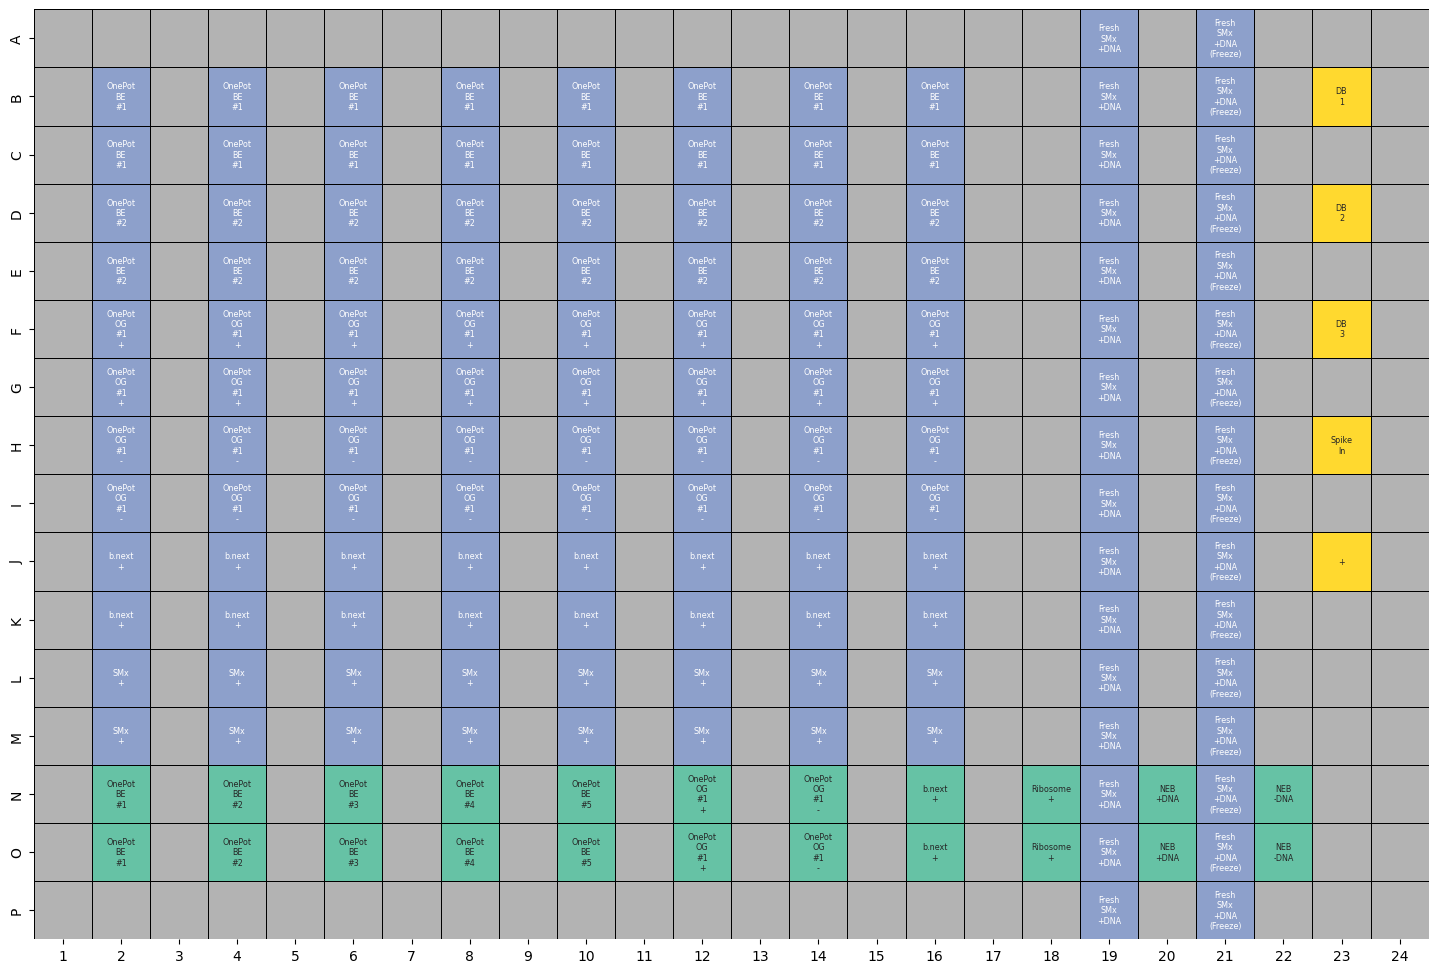

In [7]:
# Get a list of all the experiment names so we can map them to numbers for heatmap
experiments = list(platemap_full["Experiment"].unique()) + [""] # Include a blank value

# Pivot the platemap in to a grid that looks like the plate (i.e., Row x Column), with experiment name as the value
platemap_full_grid = pd.DataFrame(index=list("ABCDEFGHIJKLMNOP"), columns=range(1,25)) # Create a full 384-well 'plate'
platemap_full_grid.update(platemap_full.pivot(columns="Column", index="Row", values="Experiment")) # Pivot the platemap and load it in to relevant wells
platemap_full_grid = platemap_full_grid.fillna("") # Fill blanks with blank, not NaN

# Do the same thing for names so we can plot them on the heatmap
platemap_full_grid_names = pd.DataFrame(index=list("ABCDEFGHIJKLMNOP"), columns=range(1,25))
platemap_full_grid_names.update(platemap_full.pivot(columns="Column", index="Row", values="Name"))
platemap_full_grid_names = platemap_full_grid_names.fillna("")
platemap_full_grid_names = platemap_full_grid_names.apply(lambda x: x.str.replace(" ", "\n")) # Replace spaces with new lines

plt.figure(figsize=(18,18)) # Make the image bigger
sns.heatmap(
    data=platemap_full_grid.map(lambda x: experiments.index(x)),
    cmap=sns.color_palette("Set2"),
    square=True,
    linecolor="black",
    linewidths=0.5,
    annot=platemap_full_grid_names,
    annot_kws={"fontsize": "xx-small"},
    fmt="s",
    cbar=False
)

## Load Platemap

Now we can load our merged platemap back in, using the normal CDK code.

In [5]:
data_file = "../2-data/20250516-191816-pure-timecourse-gfp-FULL-SEND-biotek-cdk.txt"
platemap_file = "./20250516-platemap-full.tsv"

data, platemap = pr.load_platereader_data(data_file, platemap_file)
data.head()

,index,Time,Well,Data,Row,Column,Read,Experiment,Name,Type,...,OnePot Ribos #1 (uL),OnePot Ribos #2 (uL),Poison,NEB Solution A (uL),NEB Solution B (uL),Dialysis Buffer #1 (uL),Dialysis Buffer #2 (uL),Dialysis Buffer #3 (uL),ArgRS Protein (uL),Ultrapure Water (uL)
0,2610,0 days 00:00:00,A19,43,A,19,GFP-Gext,Full Send,Fresh SMx +DNA,Sample,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2611,0 days 00:05:00,A19,42,A,19,GFP-Gext,Full Send,Fresh SMx +DNA,Sample,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2612,0 days 00:10:00,A19,38,A,19,GFP-Gext,Full Send,Fresh SMx +DNA,Sample,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2613,0 days 00:15:00,A19,46,A,19,GFP-Gext,Full Send,Fresh SMx +DNA,Sample,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2614,0 days 00:20:00,A19,47,A,19,GFP-Gext,Full Send,Fresh SMx +DNA,Sample,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Basic Plots

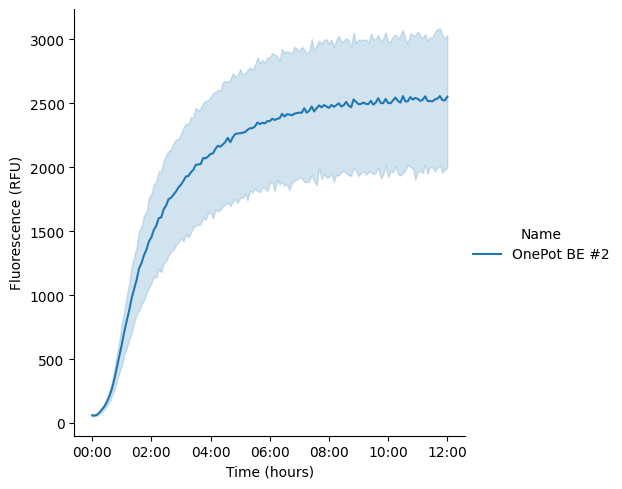

In [8]:
tmp1 = data[data["OnePot Ribos #2 (uL)"] != 0.00]

pr.plot_curves(tmp1)

## Kinetics 
Kinetic time traces of every well on the plate

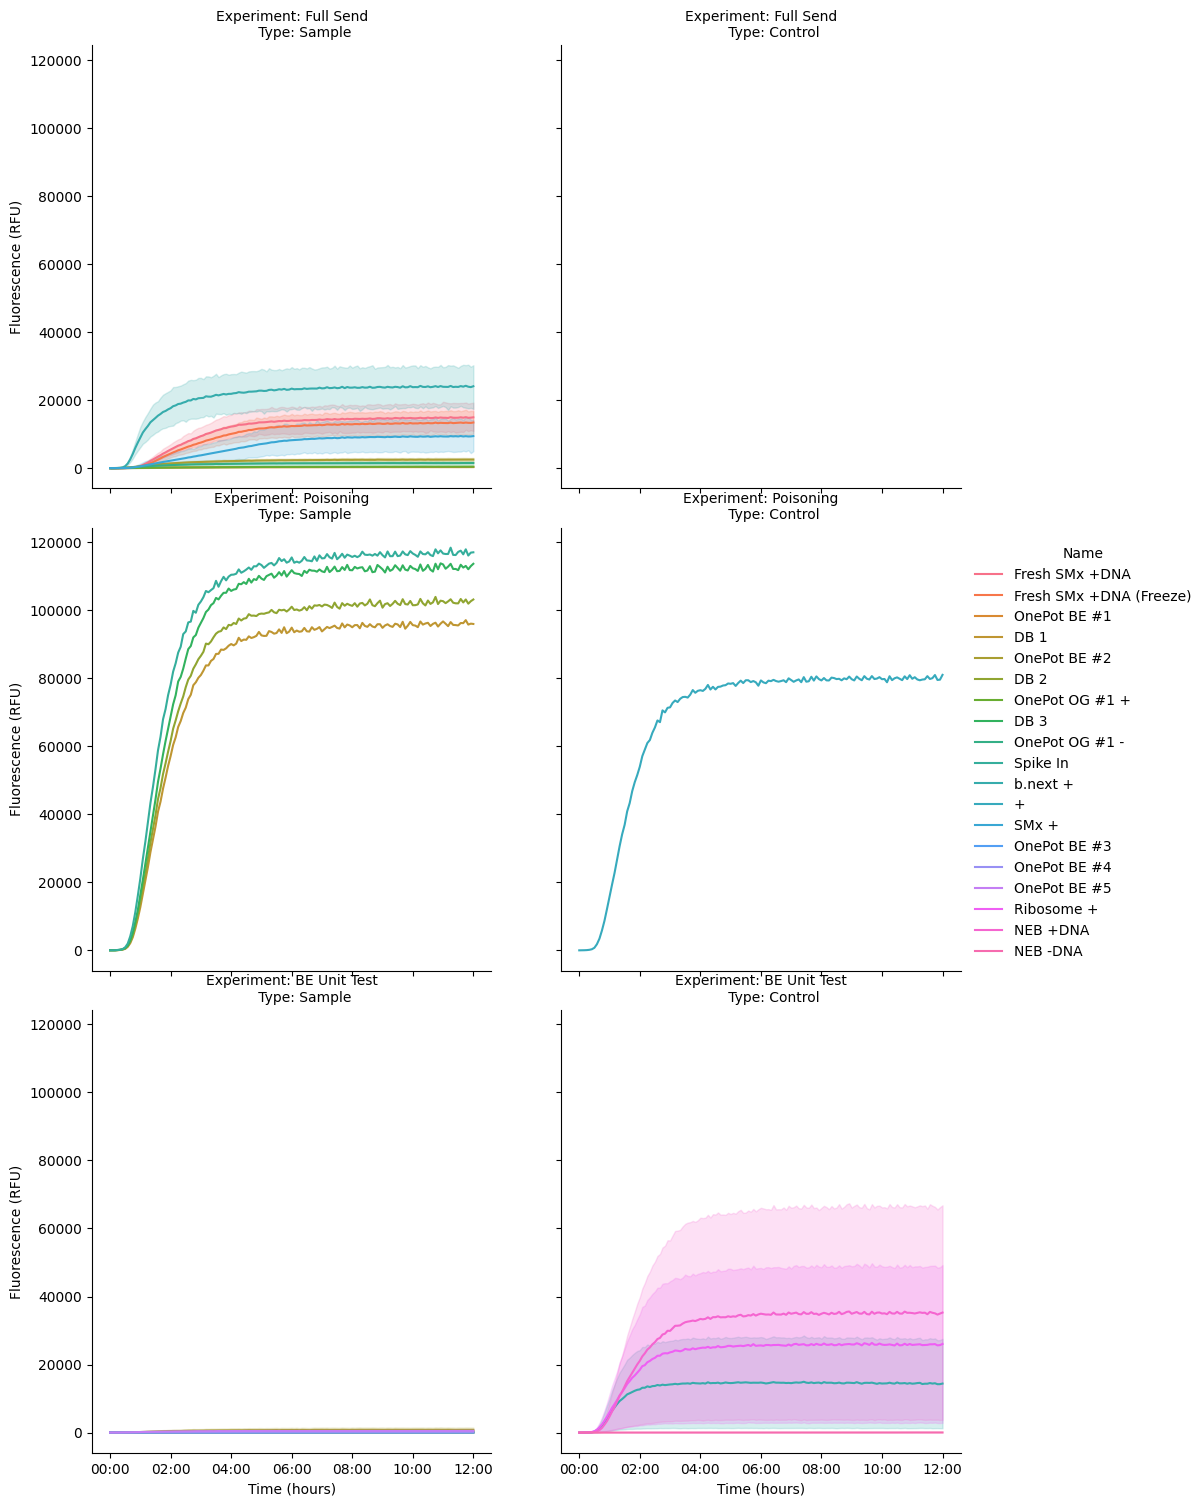

In [40]:
pr.plot_curves(
    data,
    col="Type",
    row="Experiment"
)

This is pretty confusing to read, let's look at them experiment-by-experiment.

## Buffer Exchange
Plot the buffer exchange data by itself, with the controls on a separate plot/y axis because of the difference in range.

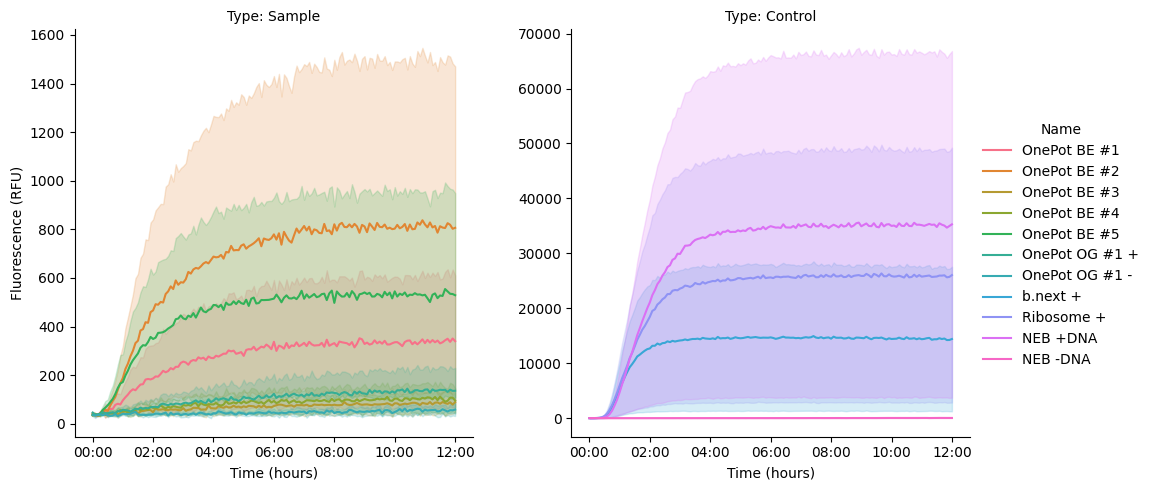

In [45]:
pr.plot_curves(
    data=data[data["Experiment"] == "BE Unit Test"],
    col="Type",
    facet_kws={"sharey": False}
)

Why on earth is the variance so high? It looks like we're mixing up replicates. Plot the individual lines separately.

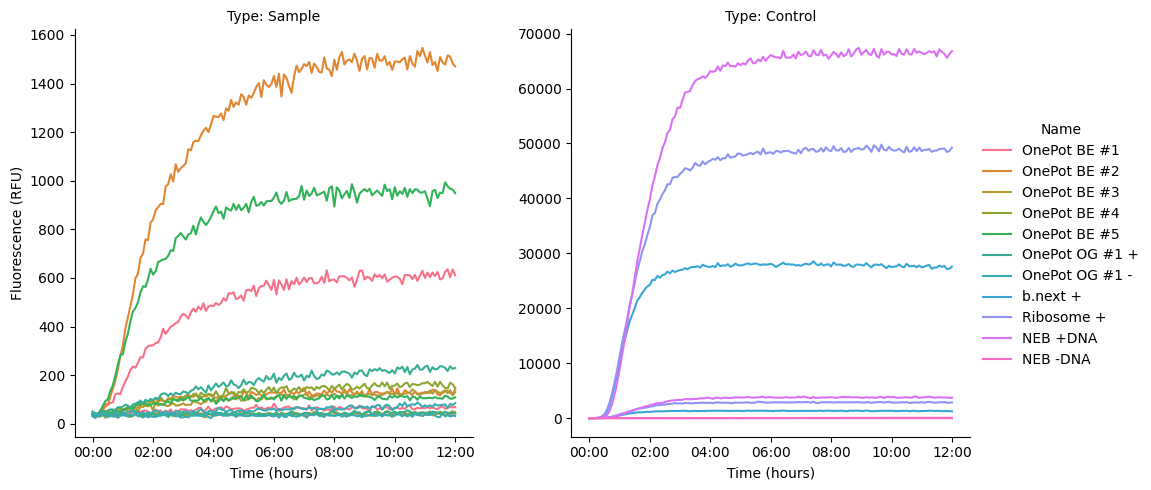

In [46]:
pr.plot_curves(
    data=data[data["Experiment"] == "BE Unit Test"],
    col="Type",
    units="Well", # Group by well, not sample ID
    estimator=None, # Required to remove error bar
    facet_kws={"sharey": False}
)

This suspiciously looks like one or the other of the duplicates is massively lower, including the controls. What could be happening?

Plot the rows separately:

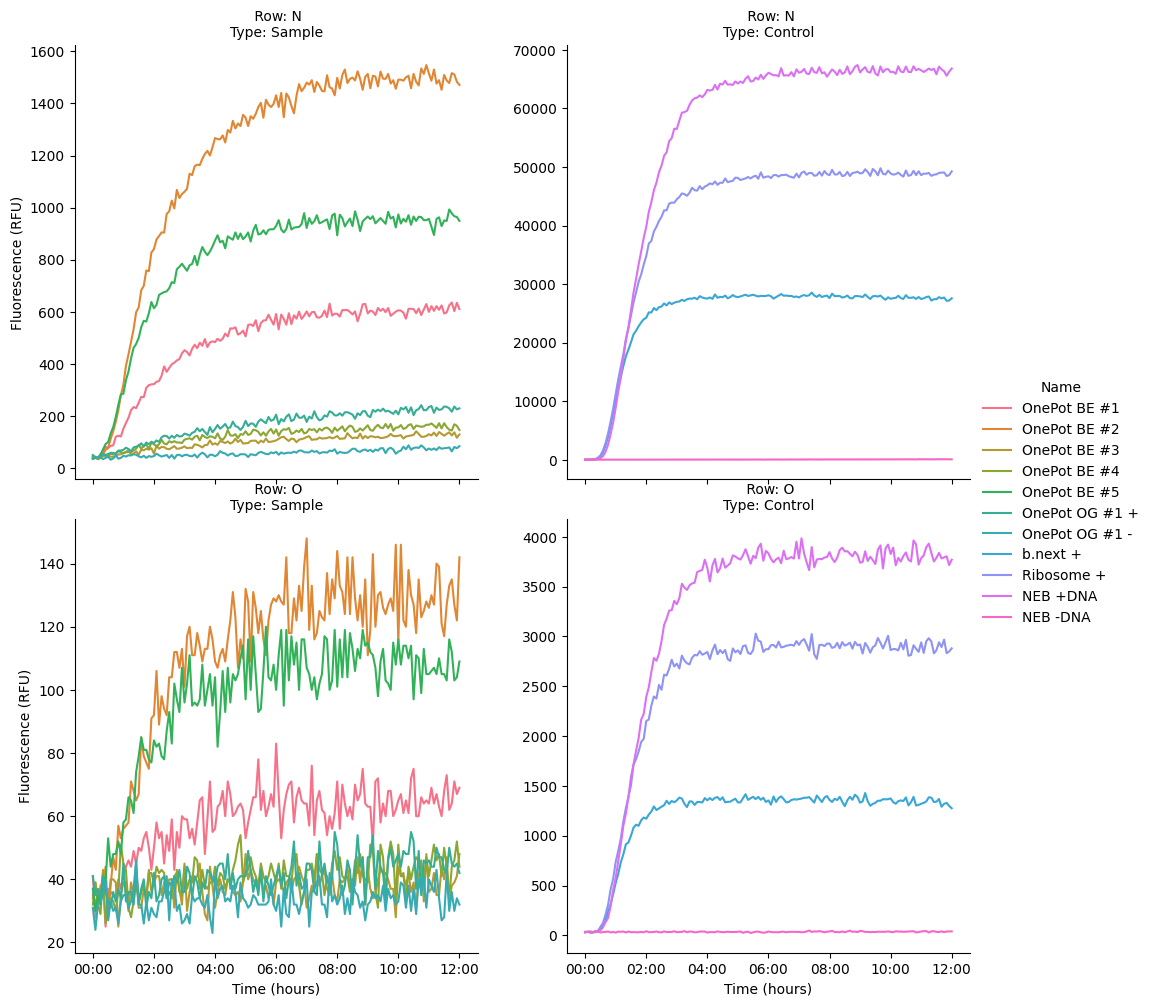

In [10]:
pr.plot_curves(
    data=data[data["Experiment"] == "BE Unit Test"],
    col="Type",
    row="Row",
    units="Well", # Group by well, not sample ID
    estimator=None, # Required to remove error bar
    facet_kws={"sharey": False}
)

# Plate Reading Debug

The `O` row is super low, including the controls. What is going on there?

Digging into this, the bottom rows were reading low due to a slight inaccuracy in the plate reader. Quickly loading a calibration plate I made using HPTS and ran using the same settings. We didn't set up CDK export for this quick test, so I'll have to raw-extract the data.

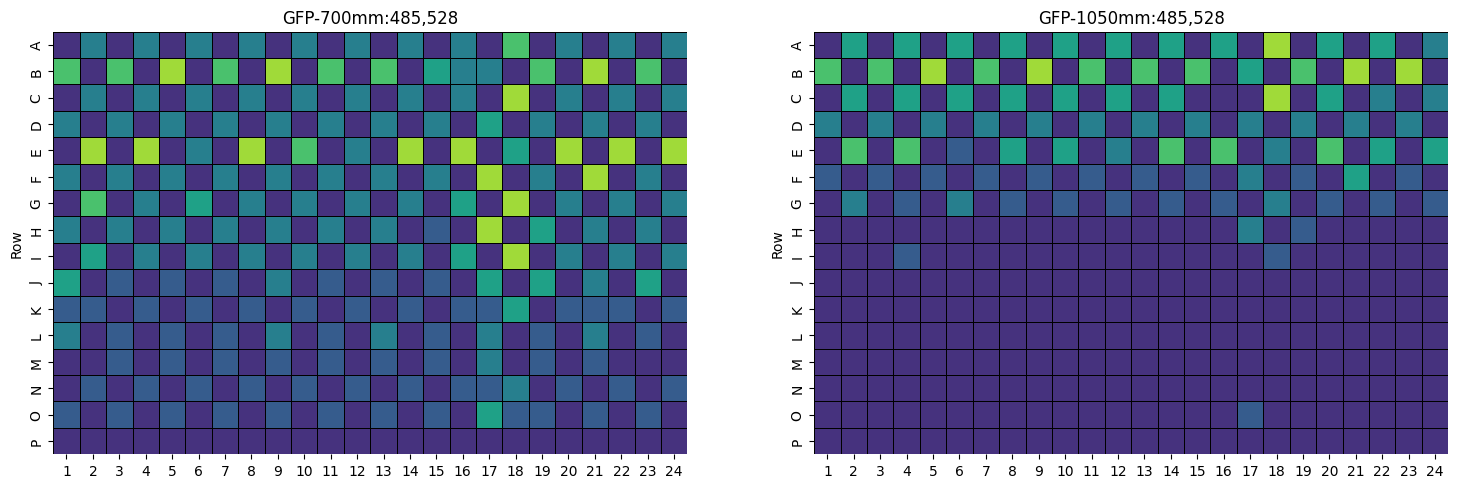

In [117]:
import io
import re
from matplotlib.colors import LogNorm, Normalize

with open("../2-data/20250519-NoName-hpts-plate-scan.txt") as f:
    calib_data_raw = f.read()
    calib_data_results = re.search(r"\n\nResults\n(.*)\n\n", calib_data_raw, re.DOTALL | re.MULTILINE)[1]
    calib_data = pd.read_table(io.StringIO(calib_data_results), index_col=False, names=["Row"] + list(range(1,25)) + ["Read"], skiprows=1)

    # Fill in row labels correctly
    # The BioTek export doesn't have the row on every line, it puts it on the first line on that row (e.g., "A")
    # and then the subsequent values of row A are all blank. Annoying.
    # In retrospect, it would have been much easier to just export this data in the right format in the first place...
    calib_data["Row"] = calib_data["Row"].ffill() 
    calib_data = calib_data.set_index(calib_data.columns[0]) # Make the row names the index now we've filled them in correctly

g, axes = plt.subplots(1, 2, figsize=(18,18))
for i, read in enumerate(calib_data["Read"].unique()):
    sns.heatmap(
        data=calib_data[calib_data["Read"] == read].iloc[:,:-1],
        cmap=sns.color_palette("viridis"),
        square=True,
        linecolor="black",
        linewidths=0.5,
        cbar=False,
        ax=axes[i]
        # norm=LogNorm()
    )
    axes[i].set_title(read)

The left hand plot (GFP-700mm) is the capture conditions we used on the main experiment. We see a somewhat worrying falloff in brightness as we get further down the plate (toward rows M, N, O), with the final row (P) reading as zero. Needs more digging into, but this it likely causing the split we see in the buffer exchange data. Fortunately, all of our earlier experiments were in the top half of the plate.

For now, let's just analyze the first replicate of the buffer exchange samples, since they seem fine.

# Buffer Exchange 2.0

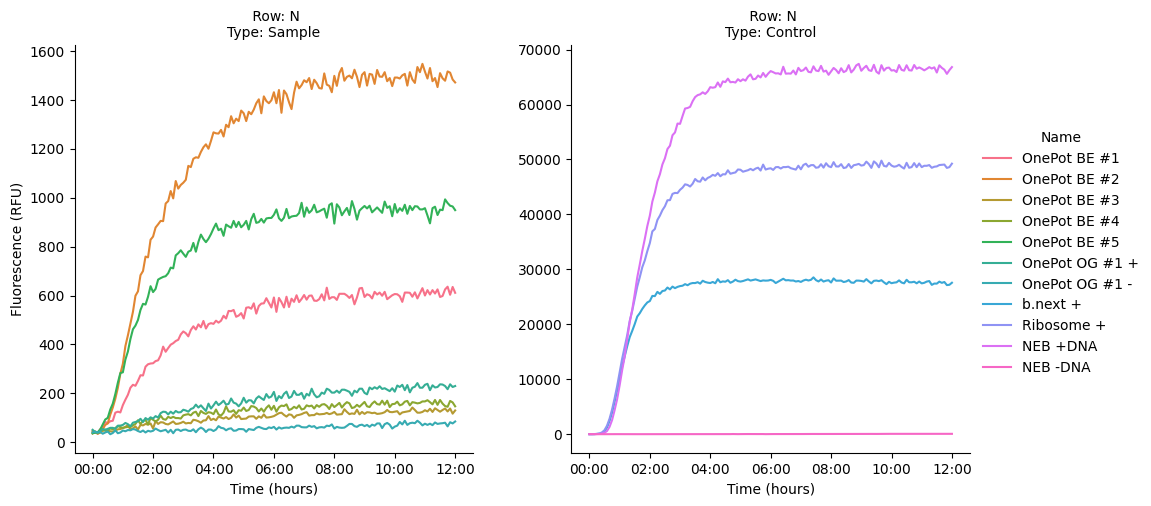

In [119]:
pr.plot_curves(
    data=data[(data["Experiment"] == "BE Unit Test") & (data["Row"] == "N")],
    col="Type",
    row="Row",
    units="Well", # Group by well, not sample ID
    estimator=None, # Required to remove error bar
    facet_kws={"sharey": False}
)

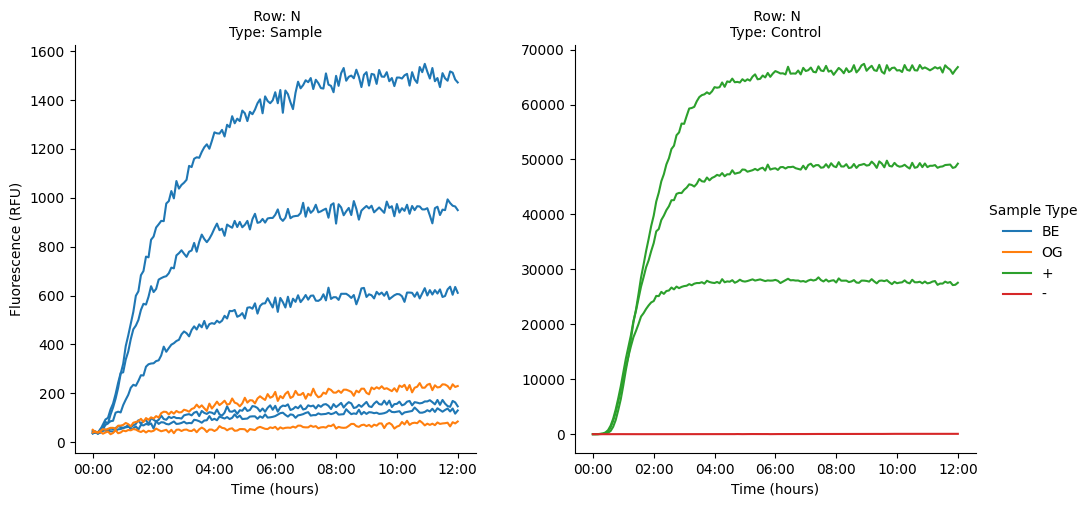

In [159]:
# Make a dataframe of just the BE data for simplicity.
# Make it a copy so we don't accidentally propagate changes to the main dataframe
data_be = data[(data["Experiment"] == "BE Unit Test") & (data["Row"] == "N")].copy()

# Split the name by space and pull out the second word.
# We could have added this column in the original plate map if we'd predicted we wanted to color this way
data_be["Sample Type"] = data_be["Name"].str.split(" ").str[1]

# Make the +ves have the same tag; we should have made these consistent in the original plate map.
data_be["Sample Type"] = data_be["Sample Type"].str.replace("DNA", "")
data_be["Sample Type"].unique()

g_be_curves = pr.plot_curves(
    data=data_be,
    hue="Sample Type",
    # style="Sample Type",
    col="Type",
    row="Row",
    units="Well", # Group by well, not sample ID
    estimator=None, # Required to remove error bar
    facet_kws={"sharey": False}
)

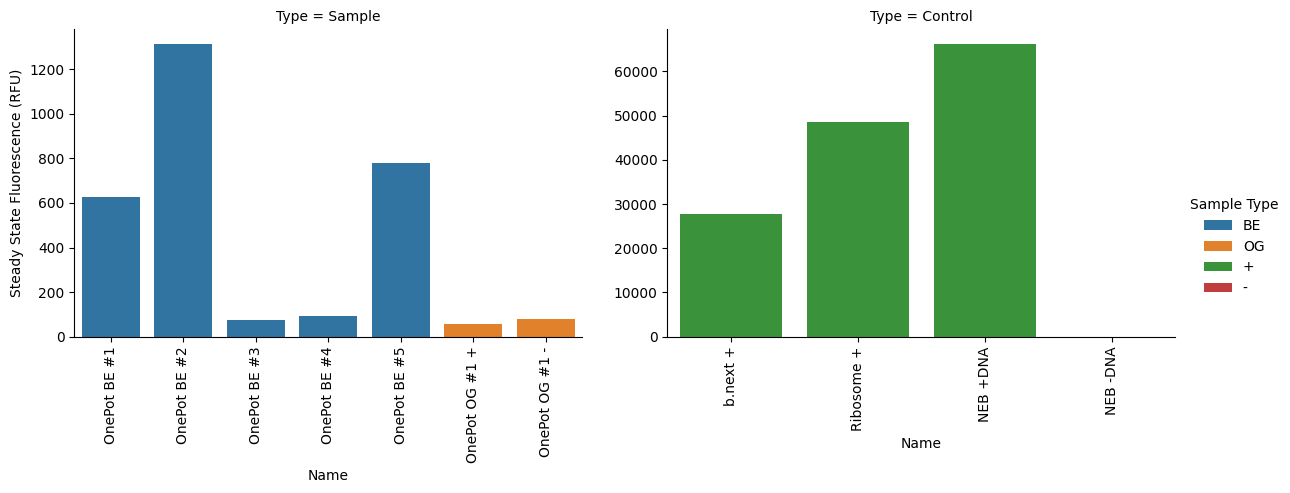

In [160]:
g_be_ss = pr.plot_steadystate(
    data=data_be,
    hue="Sample Type",
    col="Type",
    sharey=False
    # row="Row",
    # units="Well", # Group by well, not sample ID
    # estimator=None, # Required to remove error bar
    # facet_kws={"sharey": False}
)

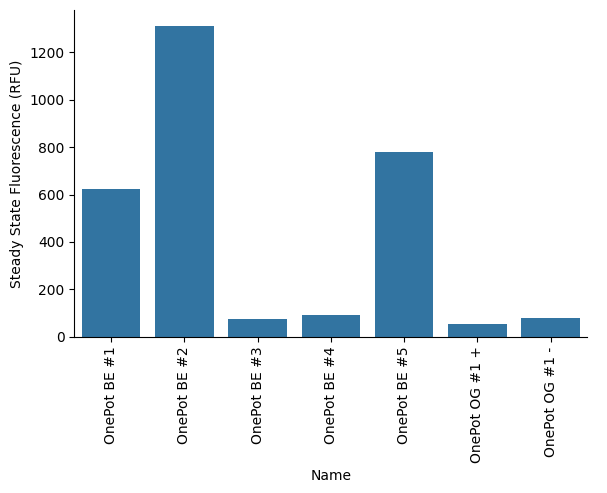

In [121]:
# Zoom the non-control samples
pr.plot_steadystate(
    data=data[(data["Experiment"] == "BE Unit Test") & (data["Row"] == "N") & (data["Type"] == "Sample")],
)

Cool to note that some BE OnePot did a lot better, which means we're seeing an improvement.

In [176]:
pr.kinetic_analysis(data_be)

Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


Velocity                 \
                                        Time     Data   Max   
Well Name           Read                                      
N2   OnePot BE #1   GFP-Gext 0 days 06:10:00   590.00  0.19   
N4   OnePot BE #2   GFP-Gext 0 days 01:05:00   393.00  0.24   
N6   OnePot BE #3   GFP-Gext 0 days 02:05:00    87.00  0.10   
N8   OnePot BE #4   GFP-Gext 0 days 01:55:00    99.00  0.09   
N10  OnePot BE #5   GFP-Gext 0 days 02:45:00   764.00  0.18   
N12  OnePot OG #1 + GFP-Gext 0 days 00:20:00    54.00  0.03   
N14  OnePot OG #1 - GFP-Gext             NaT      NaN   NaN   
N16  b.next +       GFP-Gext 0 days 01:05:00 12339.00  7.80   
N18  Ribosome +     GFP-Gext 0 days 01:20:00 20613.00  8.63   
N20  NEB +DNA       GFP-Gext 0 days 01:15:00 17290.00 10.57   
N22  NEB -DNA       GFP-Gext             NaT      NaN   NaN   

                                                   Lag          \
                                                  Time    Data   
Well Name           Read                                         
N2   OnePot BE #1   GFP-Gext 0 days 05:18:14.736842105    0.00   
N4   OnePot BE #2   GFP-Gext    0 days 00:37:42.500000  202.92   
N6   OnePot BE #3   GFP-Gext 0 days 01:50:58.064516129   70.55   
N8   OnePot BE #4   GFP-Gext 0 days 01:35:57.692307692   80.01   
N10  OnePot BE #5   GFP-Gext 0 days 01:32:55.471698113  512.11   
N12  OnePot OG #1 + GFP-Gext         -1 days +23:46:15   39.69   
N14  OnePot OG #1 - GFP-Gext                       NaT     NaN   
N16  b.next +       GFP-Gext 0 days 00:38:38.076923077    0.00   
N18  Ribosome +     GFP-Gext 0 days 00:40:12.393822394 5642.52   
N20  NEB +DNA       GFP-Gext 0 days 00:47:44.754098361    0.00   
N22  NEB -DNA       GFP-Gext                       NaT     NaN   

                                Steady State               Fit                
                                        Time     Data        L    k       x0  
Well Name           Read                                                      
N2   OnePot BE #1   GFP-Gext 0 days 11:40:00   625.00     0.00 0.00     0.00  
N4   OnePot BE #2   GFP-Gext 0 days 05:05:00  1313.00  1272.93 0.00  5953.46  
N6   OnePot BE #3   GFP-Gext 0 days 02:25:00    75.00   213.58 0.00 13195.66  
N8   OnePot BE #4   GFP-Gext 0 days 02:25:00    92.00   128.87 0.00  3728.28  
N10  OnePot BE #5   GFP-Gext 0 days 03:25:00   779.00   772.50 0.00  4455.27  
N12  OnePot OG #1 + GFP-Gext 0 days 00:45:00    55.00   152.66 0.00  5515.15  
N14  OnePot OG #1 - GFP-Gext             NaT      NaN      NaN  NaN      NaN  
N16  b.next +       GFP-Gext 0 days 05:00:00 27794.00     0.00 0.00     0.00  
N18  Ribosome +     GFP-Gext 0 days 06:30:00 48614.00 47348.86 0.00  5501.96  
N20  NEB +DNA       GFP-Gext 0 days 10:00:00 66181.00     0.00 0.00     0.00  
N22  NEB -DNA       GFP-Gext             NaT      NaN      NaN  NaN      NaN

Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


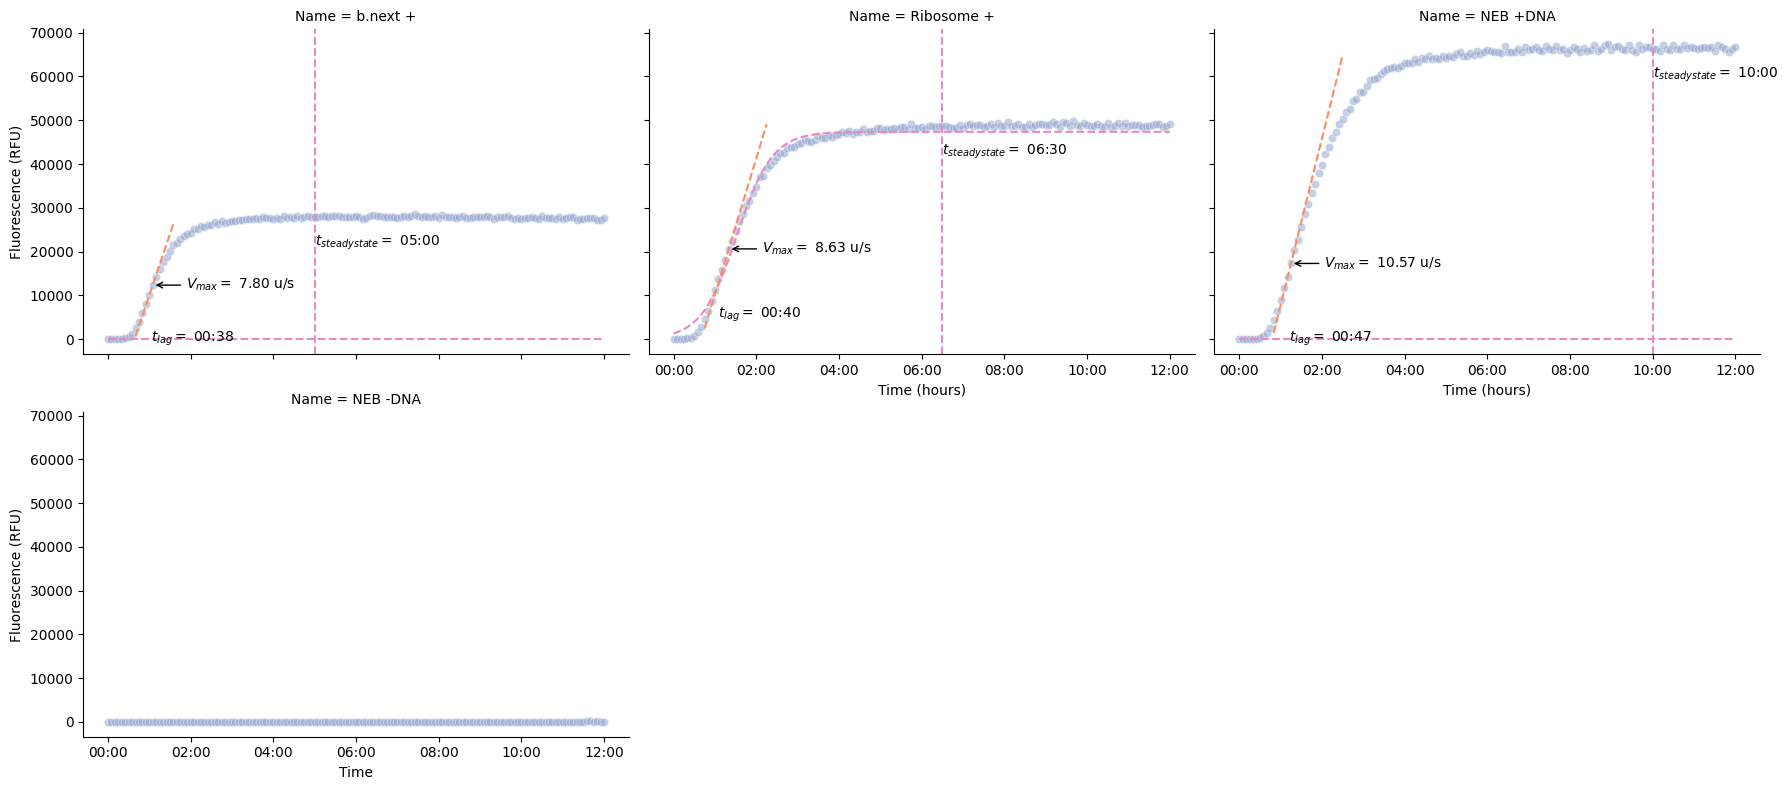

In [173]:
pr.plot_kinetics(data=data_be[data_be["Type"] == "Control"], show_fit=True)

Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


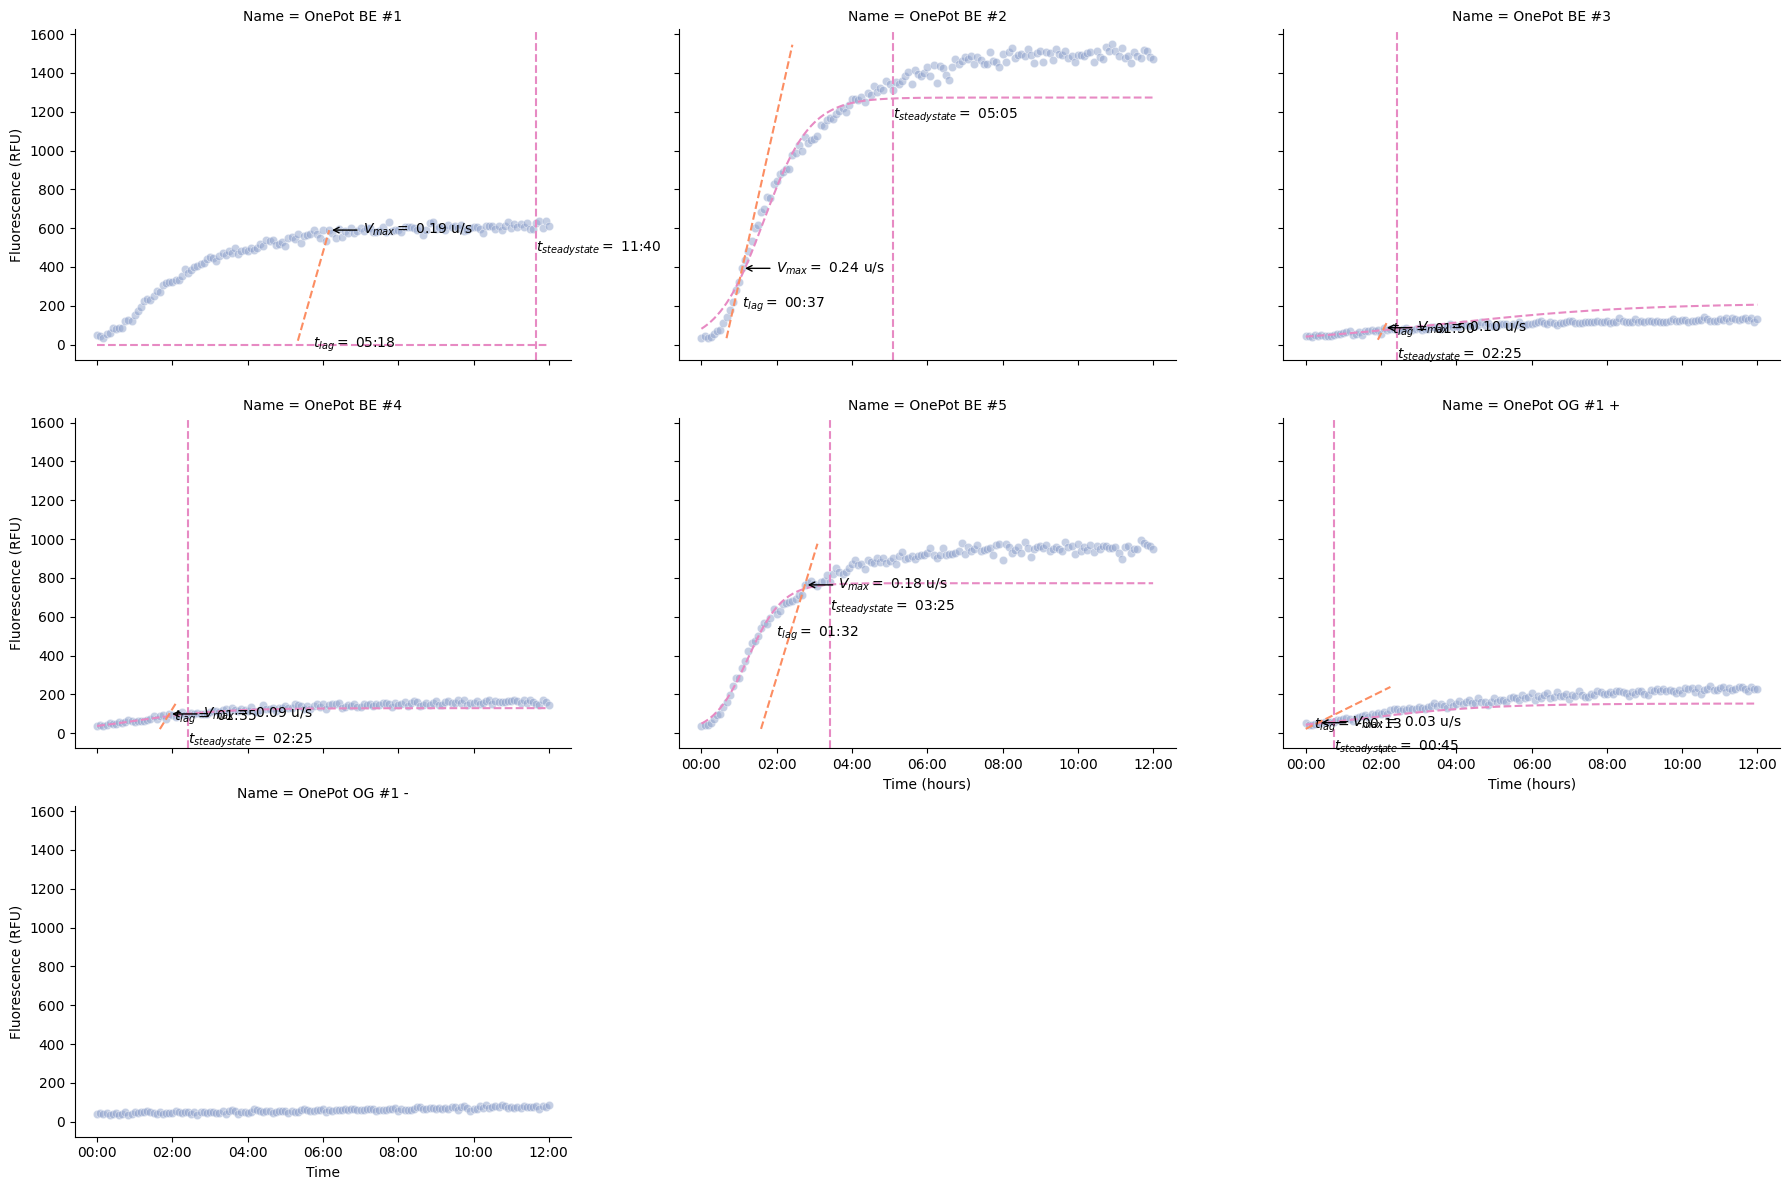

In [172]:
pr.plot_kinetics(data=data_be[data_be["Type"] == "Sample"], show_fit=True)

We haven't done too much kinetics analysis on low-expressing things; good to notice we're seeing a kind of bug here (or at least potential upgrade) where the noise in the signal is leading to weird calculation of Vmax and therefore other parameter. Too be upgraded...

# Full Send

In [133]:
platemap_full_grid_supplement.dtypes

1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
dtype: object

TypeError: Image data of dtype object cannot be converted to float

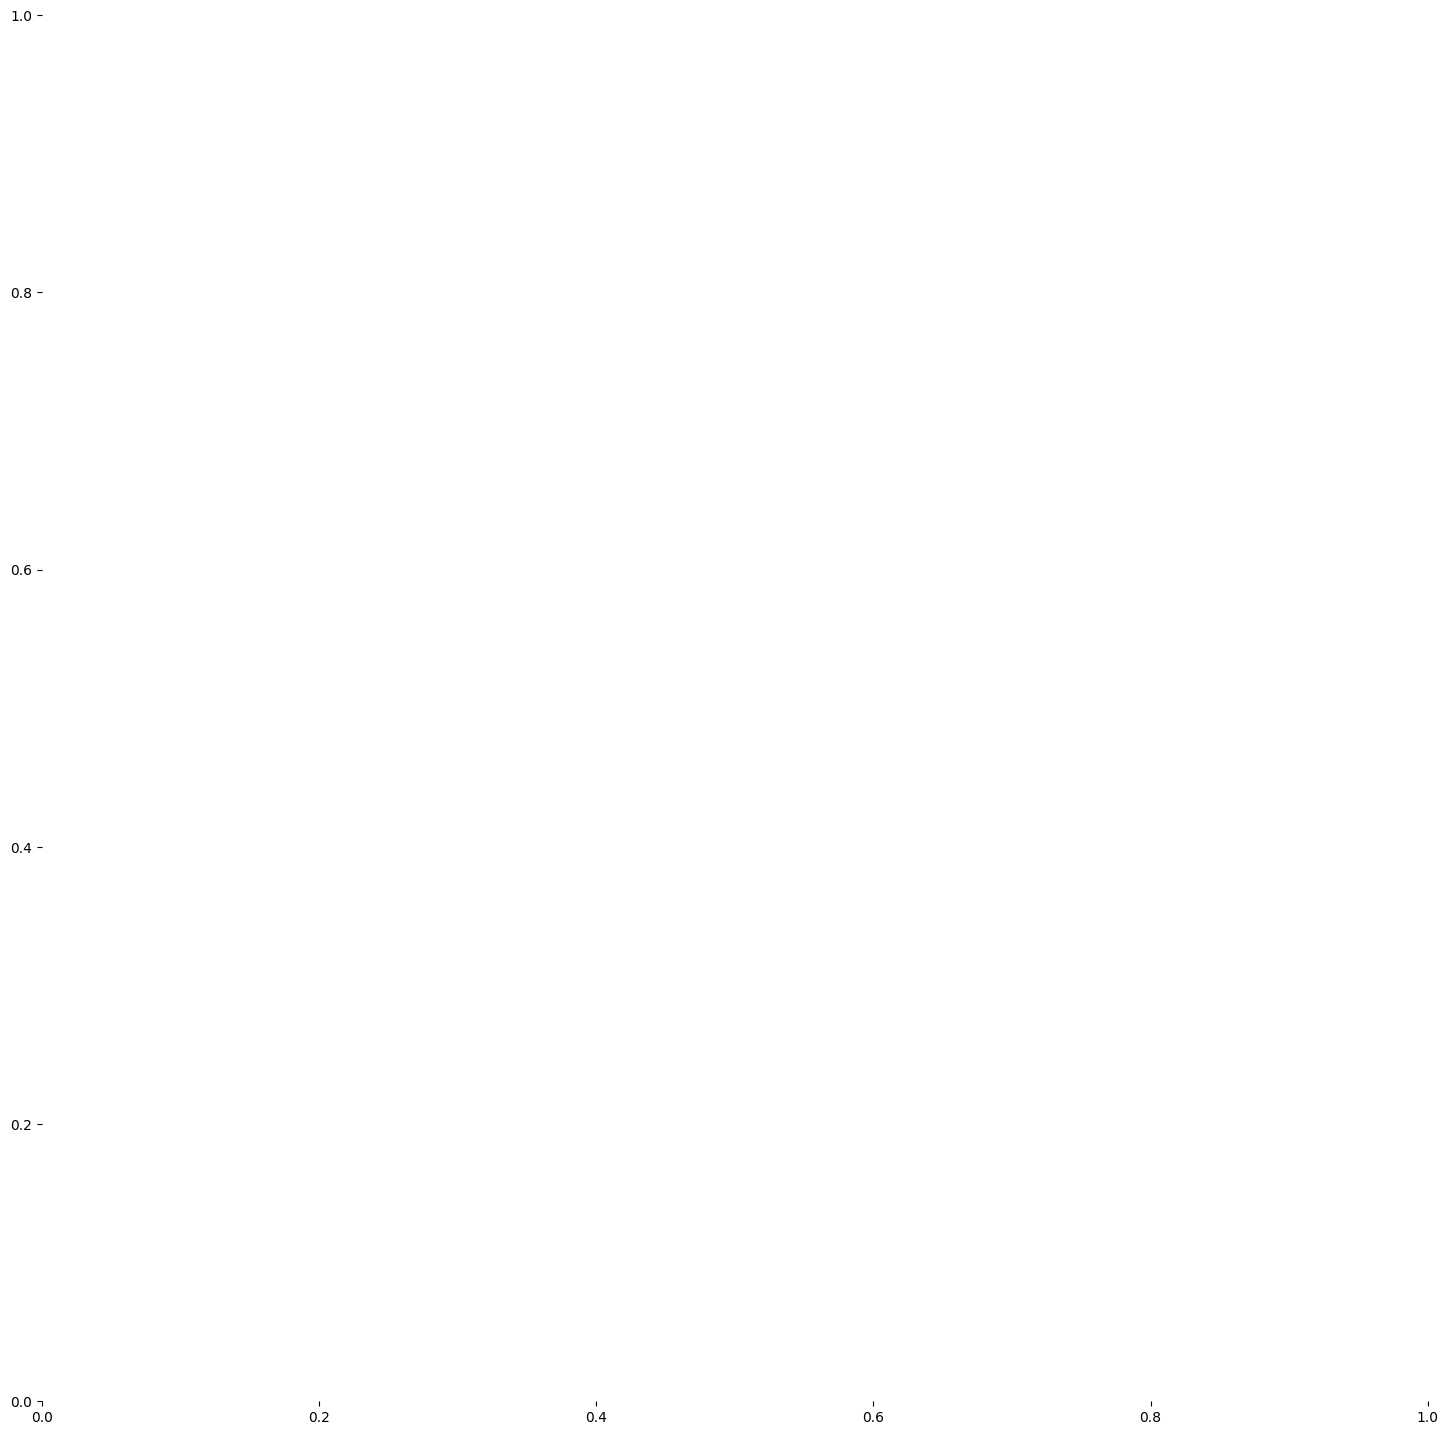

In [132]:
# Pivot the platemap in to a grid that looks like the plate (i.e., Row x Column), with experiment name as the value
platemap_full_grid_supplement = pd.DataFrame(index=list("ABCDEFGHIJKLMNOP"), columns=range(1,25)) # Create a full 384-well 'plate'
platemap_full_grid_supplement.update(platemap_full.pivot(columns="Column", index="Row", values="Mg2+ Supplement (mM)")) # Pivot the platemap and load it in to relevant wells
# platemap_full_grid = platemap_full_grid.fillna("") # Fill blanks with blank, not NaN

plt.figure(figsize=(18,18)) # Make the image bigger
sns.heatmap(
    data=platemap_full_grid_supplement,
    cmap=sns.color_palette("viridis"),
    square=True,
    linecolor="black",
    linewidths=0.5,
    annot=platemap_full_grid_names,
    annot_kws={"fontsize": "xx-small"},
    fmt="s",
    cbar=False
)

In [127]:
platemap_fs = platemap[platemap["Experiment"] == "Full Send"]
platemap_fs.columns

Index(['Well', 'Experiment', 'Name', 'Type', 'Replicate', 'NEB Sol A (uL)',
       'NEB Sol B (uL)', 'NEB Sol B -Ribos (uL)', 'OnePot PMx BE #1 (uL)',
       'OnePot PMx BE #2 (uL)', 'OnePot PMx BE #3 (uL)',
       'OnePot PMx BE #4 (uL)', 'OnePot PMx BE #5 (uL)',
       'OnePot PMx OG #1 (uL)', 'b.next PMx (uL)', 'bn Ribosome (uL)',
       'RNase Inhibitor (uL)', 'pT7-plamGFP (uL)', 'Ultrapure water (uL)',
       'Mg2+ Supplement (mM)', 'OnePot SMx (uL)', 'Fresh SMx (uL)',
       'OnePot tRNA (uL)', 'OnePot Ribos #1 (uL)', 'OnePot Ribos #2 (uL)',
       'Poison', 'NEB Solution A (uL)', 'NEB Solution B (uL)',
       'Dialysis Buffer #1 (uL)', 'Dialysis Buffer #2 (uL)',
       'Dialysis Buffer #3 (uL)', 'ArgRS Protein (uL)',
       'Ultrapure Water (uL)'],
      dtype='object')

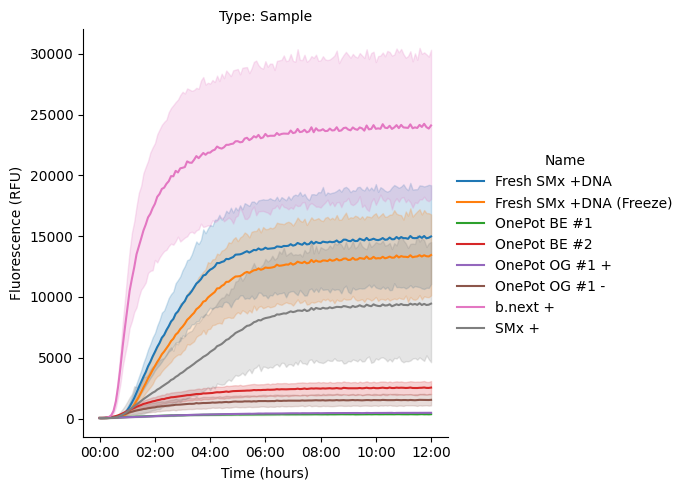

In [124]:
pr.plot_curves(
    data[data["Experiment"] == "Full Send"],
    col="Type"
)